In [1]:
import os
import json
import pandas as pd
import numpy as np

import spacy
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from collections import Counter


In [2]:
# Load the spaCy model
nlp = spacy.load('de_core_news_md')

# Define the directory containing the JSON files
corpus_directory = 'corpus_finished'

# Initialize lists to store the data
titles = []
categories = []
genders = []
authors = []
poems = []
line_data = []

# Iterate over the JSON files
for file_name in os.listdir(corpus_directory):
    with open(os.path.join(corpus_directory, file_name), 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract the data from the JSON
    titles.append(data['title'])
    categories.append(data['categories'])
    genders.append(data['gender'])
    authors.append(data['author'])
    
    poem_lines = [line_info['text'] for line_info in data['poem'].values() if 'text' in line_info]
    poems.append(' '.join(poem_lines))
    line_data.append(poem_lines)

# Tokenize the poem using spaCy
tokenized_poems = []
for poem in poems:
    doc = nlp(poem)
    tokens = [token.text for token in doc]
    tokenized_poems.append(tokens)

# Create a DataFrame
df = pd.DataFrame({
    'title': titles,
    'categories': categories,
    'gender': genders,
    'author': authors,
    'poem': poems,
    'line_data': line_data,
    'tokenized_poem': tokenized_poems
})
df['num_tokens'] = df['tokenized_poem'].apply(lambda x: len(x))
df['avg_verse_length'] = [round(np.mean([len(line.split()) for line in entry]), 3) for entry in df['line_data']]

df


,title,categories,gender,author,poem,line_data,tokenized_poem,num_tokens,avg_verse_length
0,125-episoden-imonki-16200,"[Leben & Beziehungen, Ehe, Verlust & Trennung,...",m,Alexandru Bulucz,125 Episoden Monk . In Worten: einhundertfünfu...,"[125 Episoden, Monk, . In Worten: einhundertfü...","[125, Episoden, Monk, ., In, Worten, :, einhun...",657,11.188
1,aber-wir-werden-durch-den-abend-11566,[Leben & Beziehungen],m,Michael Donhauser,Aber wir werden durch den Abend ewige Gebärde ...,"[Aber wir werden, durch den Abend, ewige Gebär...","[Aber, wir, werden, durch, den, Abend, ewige, ...",39,2.600
2,alemannische-mangos-15731,"[Natur, Pflanzen]",w,Marie T. Martin,Wenn die Zweige zum Boden geneigt sind kannst ...,[Wenn die Zweige zum Boden geneigt sind kannst...,"[Wenn, die, Zweige, zum, Boden, geneigt, sind,...",159,9.353
3,alles-was-wir-tun-ist-musik-john-cage-13426,"[Musik, Popkultur, Natur, Pflanzen]",m,Volker Sielaff,Der Regentag bietet sich an gebietet sich der ...,[Der Regentag bietet sich an gebietet sich der...,"[Der, Regentag, bietet, sich, an, gebietet, si...",100,7.750
4,alp-11834,"[Humoristische Poesie, Leben & Beziehungen]",m,Steffen Jacobs,Wir sind der Welt aufs Dach gestiegen. Die Aus...,"[Wir sind der Welt, aufs Dach gestiegen. Die, ...","[Wir, sind, der, Welt, aufs, Dach, gestiegen, ...",58,4.083
...,...,...,...,...,...,...,...,...,...
225,wolkenformeln-13978,"[Dichtung, Natur, Sommer, Winter, Landschaft]",m,Jan Volker Röhnert,"Die Träume des Himmels, sagtest du im Schlaf, ...","[Die Träume des Himmels, sagtest du im Schlaf,...","[Die, Träume, des, Himmels, ,, sagtest, du, im...",545,6.333
226,wyoming-13239,"[Identität (Individuum), Religion / Spirituali...",m,Mirko Bonné,"Wenn wir über die Wäldergrenze hinausgingen, i...","[Wenn wir über die Wäldergrenze hinausgingen,,...","[Wenn, wir, über, die, Wäldergrenze, hinausgin...",155,7.625
227,zersprengte-neuigkeiten-14345,"[Leben & Beziehungen, Sprache]",m,Alexander Gumz,"ich bin wütend auf sprache, auf alles, was mit...","[ich bin wütend auf sprache, auf alles,, was m...","[ich, bin, wütend, auf, sprache, ,, auf, alles...",137,8.071
228,zwangsmittel-12267,"[Medizin & Naturwissenschaft, Natur]",m,Léonce W. Lupette,Nicht nur der Paraguayjasmin zittert eine olfa...,"[Nicht nur, der Paraguayjasmin zittert, eine o...","[Nicht, nur, der, Paraguayjasmin, zittert, ein...",194,3.140


In [3]:
def count_entries(df, gender, category):
    count = df.loc[(df['gender'] == gender) & (df['categories'].str.contains(category, na=False))].shape[0]
    return count

print(count_entries(df, 'm', 'Leben & Beziehungen'))

0


In [4]:
def get_file_info(category, directory):
    file_info = []
    gender_counts = Counter()

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Only consider .json files
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            # Read the file as json
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                # Check if the category is present in the 'categories' list
                if category in data.get('categories', []):
                    # If yes, extract additional information
                    info = {
                        'filename': filename,
                        'gender': data.get('gender'),
                        'categories': data.get('categories')
                    }
                    
                    # Update the gender counts
                    gender_counts[info['gender']] += 1

                    file_info.append(info)

    # Print the gender counts
    print(f"Total number of texts: {len(file_info)}")
    print(f"Number of texts by gender: {dict(gender_counts)}")

    return file_info

In [5]:
data1 = get_file_info("Natur", 'corpus_finished')
data2 = get_file_info("Leben & Beziehungen", 'corpus_finished')

filenames1 = set(d['filename'] for d in data1)
filenames2 = set(d['filename'] for d in data2)

# Find the common filenames
common_filenames = filenames1.intersection(filenames2)

# Print the matching entries
for item in data1 + data2:
    if item['filename'] in common_filenames:
        print(item)


Total number of texts: 117
Number of texts by gender: {'w': 52, 'm': 65}
Total number of texts: 120
Number of texts by gender: {'m': 74, 'w': 46}
{'filename': 'antarktika-15729.json', 'gender': 'w', 'categories': ['Leben & Beziehungen', 'Reisen', 'Musik', 'Natur', 'Landschaft', 'Tiere', 'Pflanzen']}
{'filename': 'aus-den-notizen-zu-einem-selbstbildnis-13237.json', 'gender': 'm', 'categories': ['Leben & Beziehungen', 'Tod / Trauer', 'Natur']}
{'filename': 'die-maulwuerfe-14378.json', 'gender': 'm', 'categories': ['Politische Lyrik', 'Gesellschaft', 'Krieg', 'Leben & Beziehungen', 'Tod / Trauer', 'Natur', 'Reimgedicht']}
{'filename': 'du-bist-eine-lilie-15524.json', 'gender': 'm', 'categories': ['Leben & Beziehungen', 'Liebe', 'Natur', 'Reimgedicht']}
{'filename': 'good-night-6059.json', 'gender': 'w', 'categories': ['Leben & Beziehungen', 'Natur', 'Tiere']}
{'filename': 'tag-im-park-10661.json', 'gender': 'm', 'categories': ['Stadt & städtisches Leben', 'Leben & Beziehungen', 'Essen & T

In [6]:
# Define the directory containing the JSON files
corpus_directory = r'corpus_finished'

pd.set_option('display.max_rows', None)

# Initialize dictionaries to store the category counts
category_counts = defaultdict(int)
category_counts_gender = defaultdict(lambda: defaultdict(int))

# Iterate over all the JSON files
for file_name in os.listdir(corpus_directory):
    with open(os.path.join(corpus_directory, file_name), 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract the categories
    categories = data.get('categories', [])

    # Update the total and gender-specific counts
    for category in categories:
        category_counts[category] += 1
        category_counts_gender[category][data['gender']] += 1

# Convert the counts to a DataFrame
df_category_counts = pd.DataFrame(category_counts_gender).T

# Add a column for the total counts
df_category_counts['total'] = df_category_counts.sum(axis=1)

# Sort the DataFrame by the total counts
df_category_counts = df_category_counts.sort_values('total', ascending=False)

df_category_counts

,m,w,total
Leben & Beziehungen,74.0,46.0,120.0
Natur,65.0,52.0,117.0
Tiere,18.0,16.0,34.0
Pflanzen,17.0,14.0,31.0
Landschaft,13.0,14.0,27.0
Reimgedicht,15.0,6.0,21.0
Zeit,9.0,8.0,17.0
Serien / Zyklen,5.0,10.0,15.0
Erinnerung,8.0,7.0,15.0
Tod / Trauer,7.0,8.0,15.0


In [7]:
def get_unique_categories(df):
    unique_categories = set()
    for category_list in df['categories']:
        unique_categories.update(category_list[0])
    return list(unique_categories)


In [8]:
def count_unique_categories(df, gender='both'):
    if gender == 'both':
        category_counts = df['categories'].explode().value_counts()
    else:
        filtered_df = df[df['gender'] == gender]
        category_counts = filtered_df['categories'].explode().value_counts()
    
    return category_counts


In [9]:
def category_counts_by_gender(df, gender):
    if gender not in ['w', 'm']:
        raise ValueError("Invalid gender value. Please provide 'w' or 'm'.")
    
    category_counts = df[df['gender'] == gender]['categories'].explode().value_counts()
    return category_counts

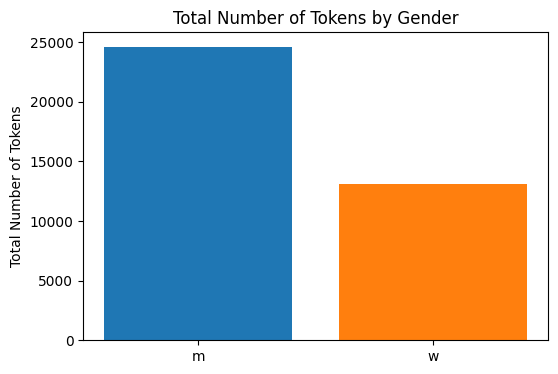

In [10]:
# Calculate the total number of tokens for each gender
total_tokens_m = df.loc[df['gender'] == 'm', 'num_tokens'].sum()
total_tokens_w = df.loc[df['gender'] == 'w', 'num_tokens'].sum()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the total number of tokens
ax.bar(['m', 'w'], [total_tokens_m, total_tokens_w], color=['tab:blue', 'tab:orange'])

# Set y-axis label and title
ax.set_ylabel('Total Number of Tokens')
ax.set_title('Total Number of Tokens by Gender')

# Show the plot
plt.show()

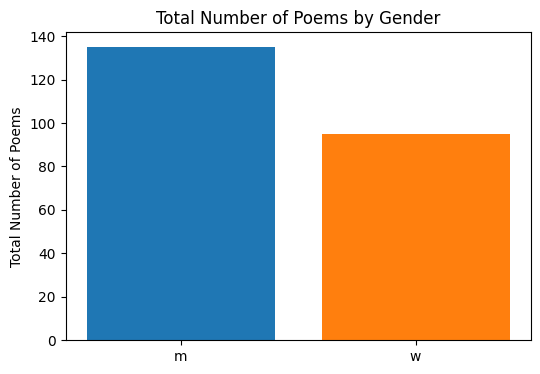

In [11]:
# Calculate the total number of tokens for each gender
total_tokens_m = df[df['gender'] == 'm'].shape[0]
total_tokens_w = df[df['gender'] == 'w'].shape[0]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the total number of tokens
ax.bar(['m', 'w'], [total_tokens_m, total_tokens_w], color=['tab:blue', 'tab:orange'])

# Set y-axis label and title
ax.set_ylabel('Total Number of Poems')
ax.set_title('Total Number of Poems by Gender')

# Show the plot
plt.show()

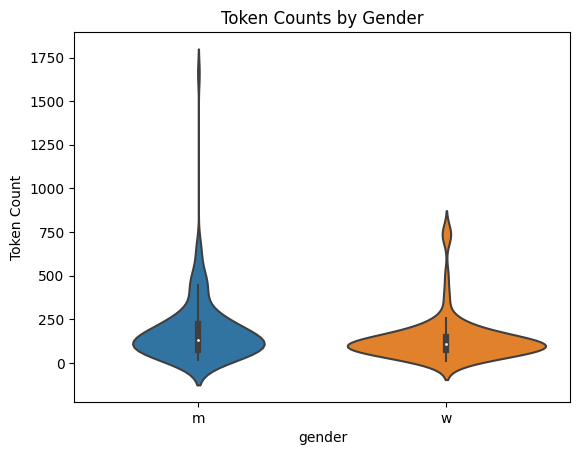

In [12]:
# Create a boxplot of token counts by gender
sns.violinplot(x='gender', y='num_tokens', data=df)

# Set y-axis label and title
plt.ylabel('Token Count')
plt.title('Token Counts by Gender')

# Show the plot
plt.show()


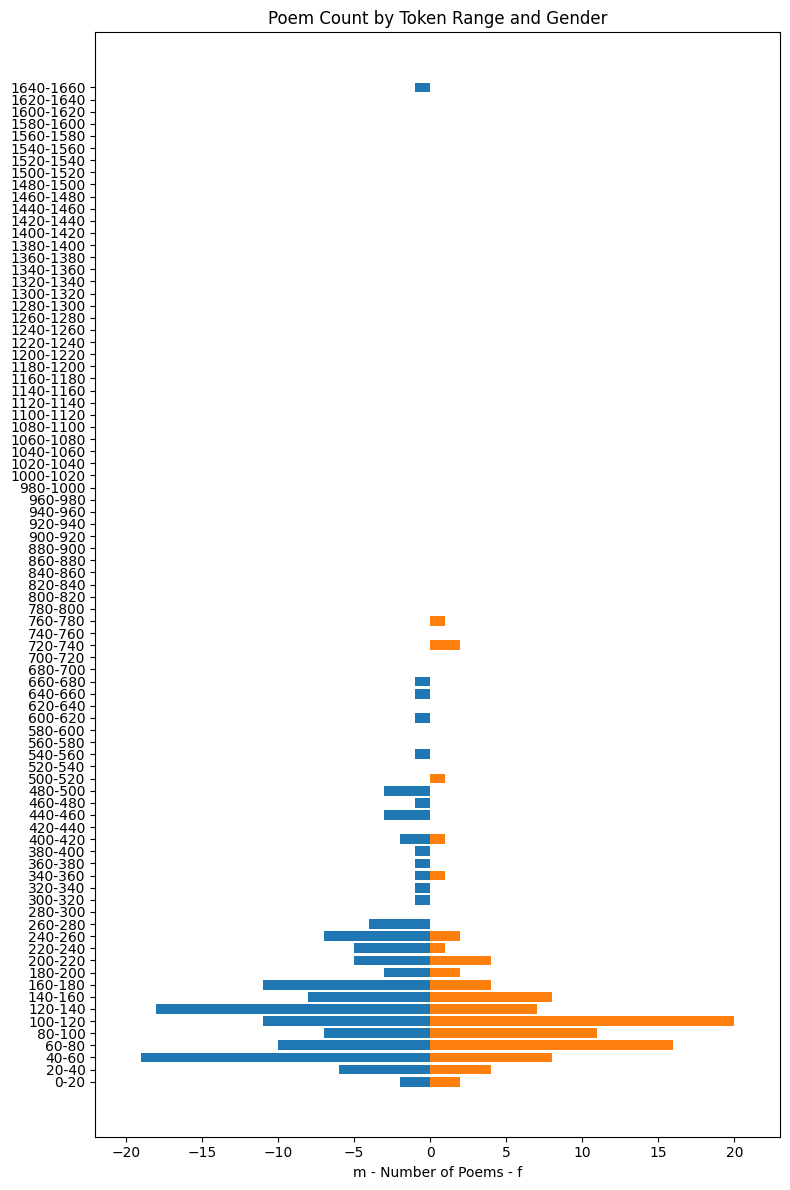

In [13]:
# Define the token range intervals
num_tokens_m = df.loc[df['gender'] == 'm', 'num_tokens']
num_tokens_w = df.loc[df['gender'] == 'w', 'num_tokens']
token_intervals = np.arange(0, max(max(num_tokens_m), max(num_tokens_w))+20, 20)

# Group the indices based on token ranges
indices_m_grouped = [np.where((num_tokens_m >= token_intervals[i]) & (num_tokens_m < token_intervals[i+1]))[0] for i in range(len(token_intervals) - 1)]
indices_w_grouped = [np.where((num_tokens_w >= token_intervals[i]) & (num_tokens_w < token_intervals[i+1]))[0] for i in range(len(token_intervals) - 1)]

# Count the number of poems in each token range
counts_m = [len(indices) for indices in indices_m_grouped]
counts_w = [len(indices) for indices in indices_w_grouped]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 12))

# Plot the number of poems for 'm' on the left side
ax.barh(range(len(counts_m)), -np.array(counts_m), color='tab:blue', align='center')

# Plot the number of poems for 'w' on the right side
ax.barh(range(len(counts_w)), np.array(counts_w), color='tab:orange', align='center')

# Set y-axis tick positions and labels
yticks = range(len(token_intervals) - 1)
yticklabels = [f"{token_intervals[i]}-{token_intervals[i+1]}" for i in range(len(token_intervals) - 1)]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# Set x-axis label and title
ax.set_xlabel('m - Number of Poems - f')
ax.set_title('Poem Count by Token Range and Gender')

# Set the x-axis limits based on the maximum number of poems
ax.set_xlim(-max(counts_m) - 3, max(counts_w) + 3)
plt.tight_layout()

# Show the plot
plt.show()


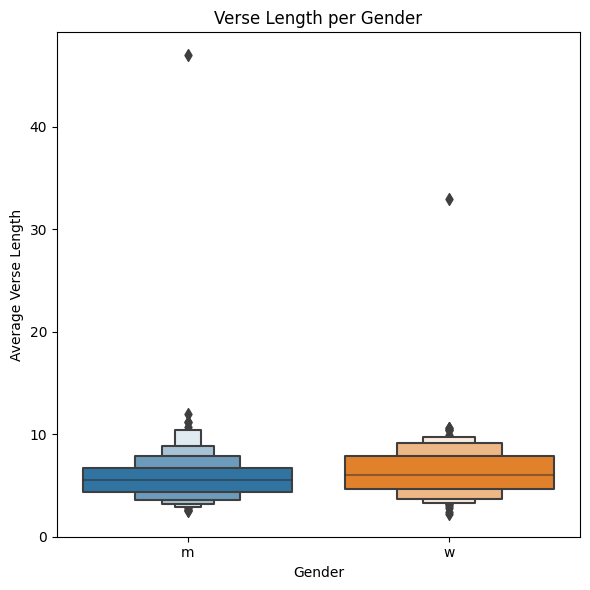

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot verse length per gender
sns.boxenplot(x='gender', y='avg_verse_length', data=df, ax=ax)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Average Verse Length')
ax.set_title('Verse Length per Gender')

# Show the plot
plt.tight_layout()
plt.show()

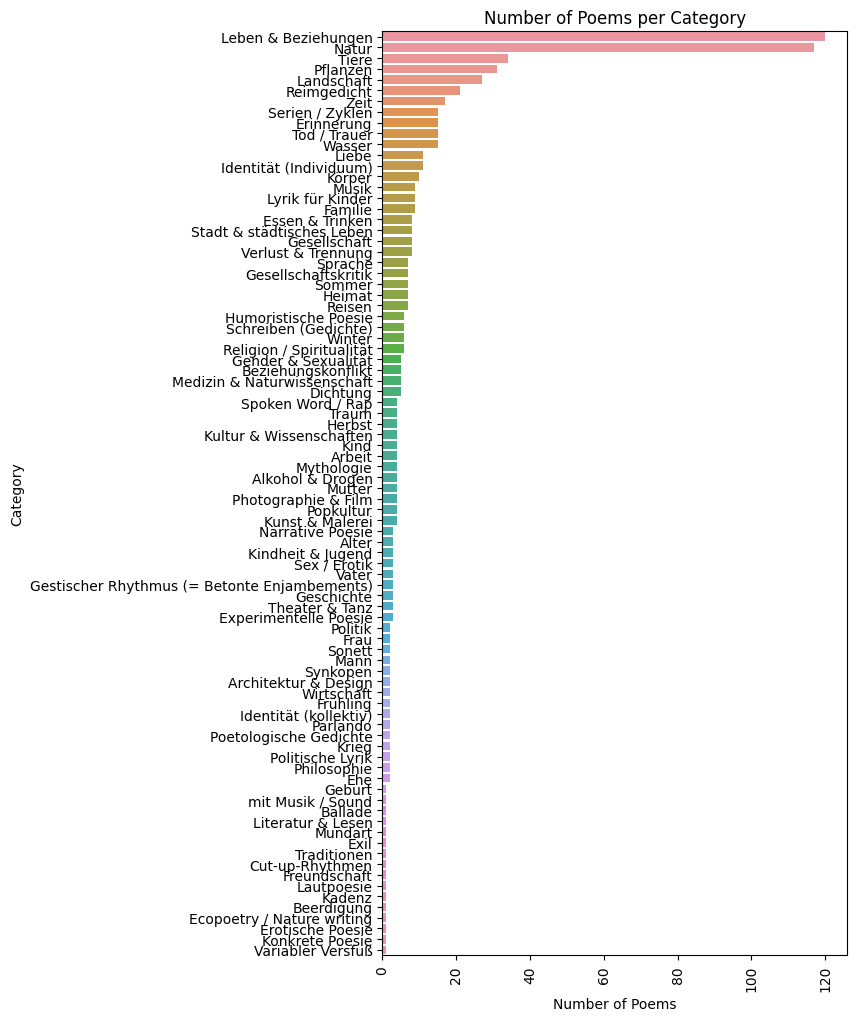

In [15]:
category_counts = df['categories'].explode().value_counts()
plt.figure(figsize=(6, 12))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.ylabel('Category')
plt.xlabel('Number of Poems')
plt.title('Number of Poems per Category')
plt.xticks(rotation=90)
plt.show()

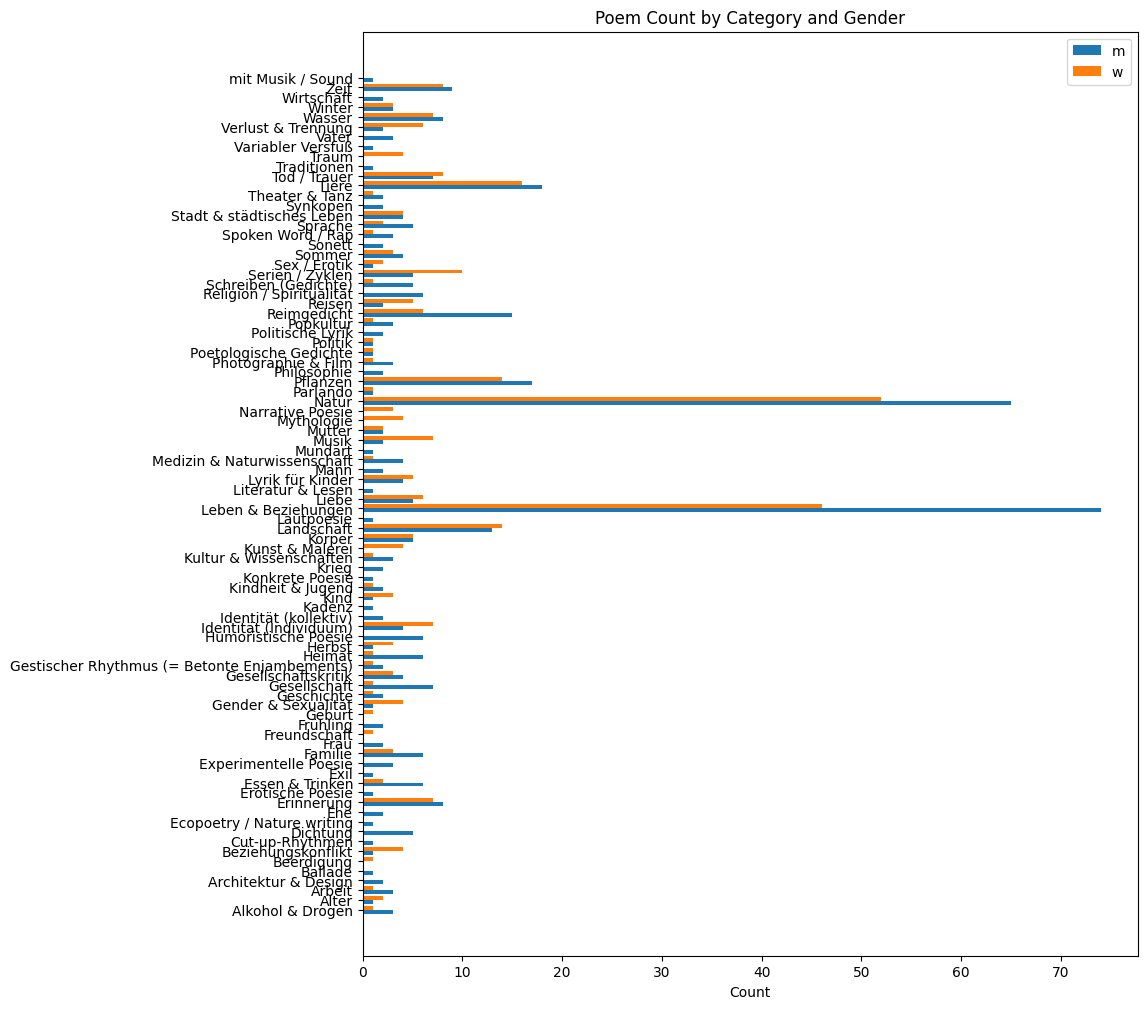

In [16]:
# Get unique categories
categories = sorted(set(category for categories in df['categories'] for category in categories))

# Initialize counts for 'm' and 'w' with zeros for all categories
counts_m = np.zeros(len(categories))
counts_w = np.zeros(len(categories))

# Calculate counts for gender 'm'
for idx, row in df[df['gender'] == 'm'].iterrows():
    for category in row['categories']:
        counts_m[categories.index(category)] += 1

# Calculate counts for gender 'w'
for idx, row in df[df['gender'] == 'w'].iterrows():
    for category in row['categories']:
        counts_w[categories.index(category)] += 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 12))

# Set the bar width
bar_width = 0.4

# Plot the counts for 'm' on the left side
ax.barh(np.arange(len(categories)) - bar_width/2, counts_m, height=bar_width, color='tab:blue', label='m')

# Plot the counts for 'w' on the right side
ax.barh(np.arange(len(categories)) + bar_width/2, counts_w, height=bar_width, color='tab:orange', label='w')

# Set y-axis tick positions and labels
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)

# Set x-axis label and title
ax.set_xlabel('Count')
ax.set_title('Poem Count by Category and Gender')

# Add legend
ax.legend()

# Show the plot
plt.show()


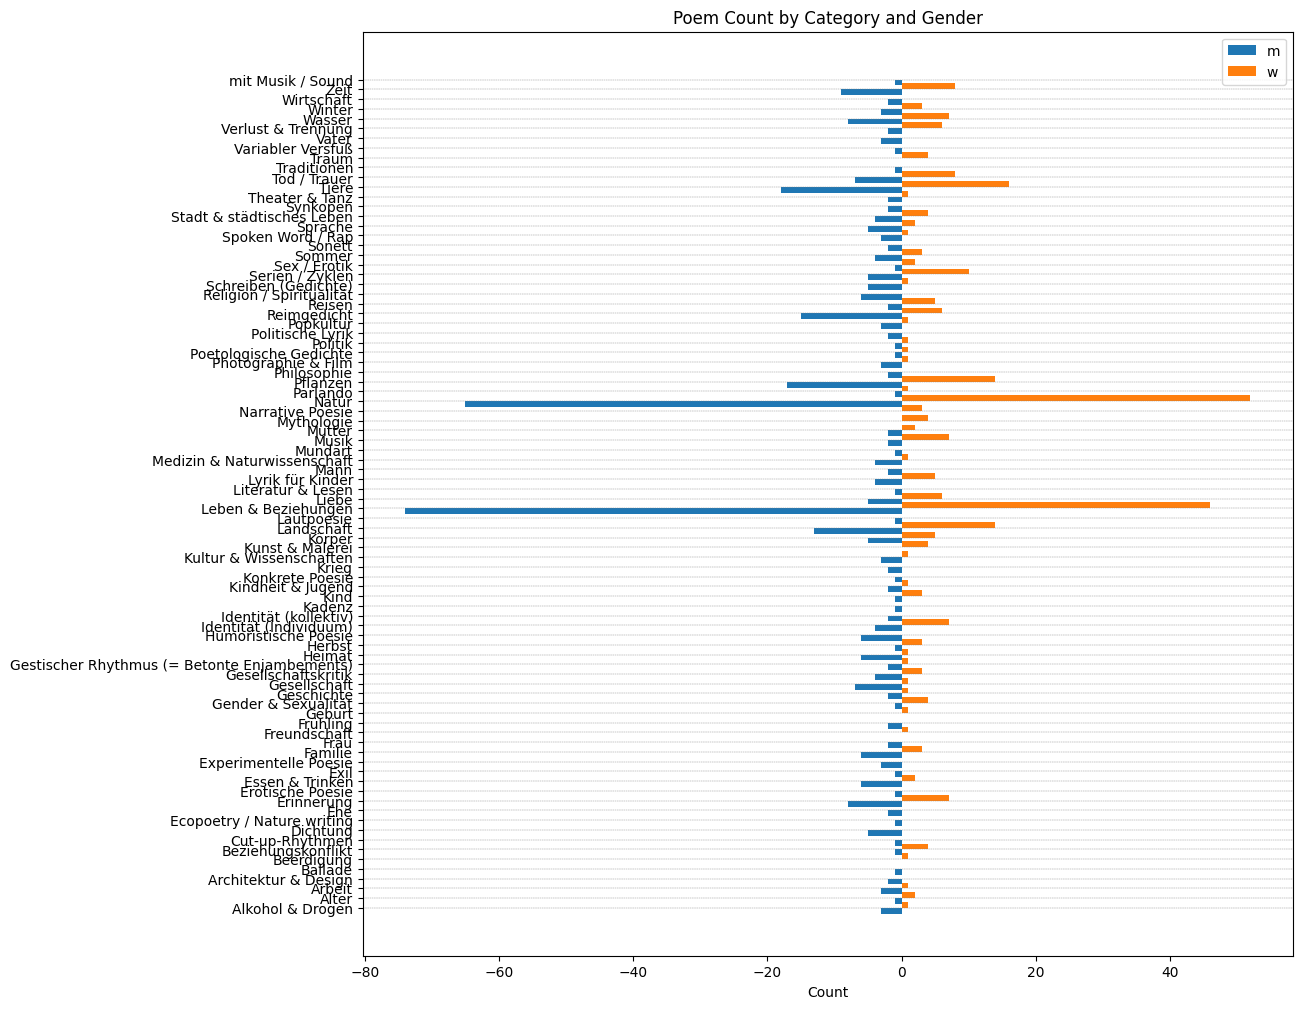

In [17]:
# Get unique categories
categories = sorted(set(category for categories in df['categories'] for category in categories))

# Initialize counts for 'm' and 'w' with zeros for all categories
counts_m = np.zeros(len(categories))
counts_w = np.zeros(len(categories))

# Calculate counts for gender 'm'
for idx, row in df[df['gender'] == 'm'].iterrows():
    for category in row['categories']:
        counts_m[categories.index(category)] += 1

# Calculate counts for gender 'w'
for idx, row in df[df['gender'] == 'w'].iterrows():
    for category in row['categories']:
        counts_w[categories.index(category)] += 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))
bar_width = 0.6

# Set the positions of the bars
bar_positions_m = np.arange(len(categories)) - bar_width/2
bar_positions_w = np.arange(len(categories)) + bar_width/2

# Plot the counts for 'm' on the left side
ax.barh(bar_positions_m, -counts_m, height=bar_width, color='tab:blue', label='m')

# Plot the counts for 'w' on the right side
ax.barh(bar_positions_w, counts_w, height=bar_width, color='tab:orange', label='w')

# Set y-axis tick positions and labels
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)

# Set x-axis label and title
ax.set_xlabel('Count')
ax.set_title('Poem Count by Category and Gender')

# Add horizontal lines for each y-tick
for y in range(len(categories)):
    plt.axhline(y, color='gray', linestyle='--', linewidth=0.3)

# Add legend
ax.legend()

# Show the plot
plt.show()


In [18]:
from collections import Counter
from operator import itemgetter

stopwords = ['!', '?', ':', ',', '.', ';', 'der', 'die', 'das', 'den', 'in', 'und', 'ist', 'ein', 'mit', 'zu', 'nicht', 'wie', 'von', 'auf', 'im']

def get_most_common_words(df, gender=None, num_words=10):
    # If a specific gender is specified, filter the dataframe
    if gender:
        df = df[df['gender'] == gender]
    
    # Concatenate all tokens from all poems into a single list
    all_tokens = [token for poem in df['tokenized_poem'] for token in poem if token not in stopwords]

    # Count the occurrences of each word
    counter = Counter(all_tokens)

    # Get the most common words
    most_common_words = counter.most_common(num_words)

    return most_common_words

# Overall
most_common_overall = get_most_common_words(df)

# Male
most_common_male = get_most_common_words(df, gender='m')

# Female
most_common_female = get_most_common_words(df, gender='w')

print("Most common words overall: ", most_common_overall)
print("Most common words for male authors: ", most_common_male)
print("Most common words for female authors: ", most_common_female)

Most common words overall:  [('ich', 476), ('du', 263), ('es', 246), ('wir', 223), ('sich', 209), ('sie', 202), ('an', 190), ('dem', 181), ('aus', 167), ('eine', 148)]
Most common words for male authors:  [('ich', 317), ('es', 162), ('an', 143), ('du', 137), ('dem', 116), ('sie', 115), ('sich', 114), ('eine', 109), ('wir', 107), ('aus', 94)]
Most common words for female authors:  [('ich', 159), ('du', 126), ('wir', 116), ('sich', 95), ('sie', 87), ('es', 84), ('aus', 73), ('dem', 65), ('er', 64), ('was', 60)]


In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,title,categories,gender,author,poem,line_data,tokenized_poem,num_tokens,avg_verse_length
0,125-episoden-imonki-16200,"[Leben & Beziehungen, Ehe, Verlust & Trennung,...",m,Alexandru Bulucz,125 Episoden Monk . In Worten: einhundertfünfu...,"[125 Episoden, Monk, . In Worten: einhundertfü...","[125, Episoden, Monk, ., In, Worten, :, einhun...",657,11.188
1,aber-wir-werden-durch-den-abend-11566,[Leben & Beziehungen],m,Michael Donhauser,Aber wir werden durch den Abend ewige Gebärde ...,"[Aber wir werden, durch den Abend, ewige Gebär...","[Aber, wir, werden, durch, den, Abend, ewige, ...",39,2.600
2,alemannische-mangos-15731,"[Natur, Pflanzen]",w,Marie T. Martin,Wenn die Zweige zum Boden geneigt sind kannst ...,[Wenn die Zweige zum Boden geneigt sind kannst...,"[Wenn, die, Zweige, zum, Boden, geneigt, sind,...",159,9.353
3,alles-was-wir-tun-ist-musik-john-cage-13426,"[Musik, Popkultur, Natur, Pflanzen]",m,Volker Sielaff,Der Regentag bietet sich an gebietet sich der ...,[Der Regentag bietet sich an gebietet sich der...,"[Der, Regentag, bietet, sich, an, gebietet, si...",100,7.750
4,alp-11834,"[Humoristische Poesie, Leben & Beziehungen]",m,Steffen Jacobs,Wir sind der Welt aufs Dach gestiegen. Die Aus...,"[Wir sind der Welt, aufs Dach gestiegen. Die, ...","[Wir, sind, der, Welt, aufs, Dach, gestiegen, ...",58,4.083
5,als-belgien-furchtbar-war-13241,"[Heimat, Liebe, Reisen, Natur]",m,Mirko Bonné,"Als es darum ging, etwas zu sagen. Als wir hin...","[Als es darum ging, etwas, zu sagen. Als wir h...","[Als, es, darum, ging, ,, etwas, zu, sagen, .,...",101,5.467
6,als-die-pferde-ungebunden-auf-den-wiesen-lebte...,"[Leben & Beziehungen, Essen & Trinken, Religio...",m,Volker Sielaff,Ich werde nicht nachdenken über deine goldenen...,[Ich werde nicht nachdenken über deine goldene...,"[Ich, werde, nicht, nachdenken, über, deine, g...",112,9.000
7,als-statussymbol-16201,"[Leben & Beziehungen, Kindheit & Jugend, Erinn...",m,Alexandru Bulucz,hat die Axt des Hinterwäldlers lange der Cultu...,[hat die Axt des Hinterwäldlers lange der Cult...,"[hat, die, Axt, des, Hinterwäldlers, lange, de...",255,11.200
8,alter-mann-mit-wolken-13894,"[Leben & Beziehungen, Identität (Individuum)]",m,Max Sessner,Lass mich in deinem schäbigen Körper wohnen ei...,"[Lass mich in deinem schäbigen Körper, wohnen ...","[Lass, mich, in, deinem, schäbigen, Körper, wo...",141,6.409
9,am-fenster-abends,"[Poetologische Gedichte, Natur, Landschaft, Ti...",w,Erika Burkart,"Vor nachtgrünen Matten unterwegs zu Wörtern, K...","[Vor nachtgrünen Matten, unterwegs zu Wörtern,...","[Vor, nachtgrünen, Matten, unterwegs, zu, Wört...",53,3.667
